OpenCV读取图像基本说明，注意使用 imshow( ) 函数时需要添加 waitKey( ) 和 destroyAllWindows( )

In [2]:
import cv2 as cv

image = cv.imread("images\Fig0304(a)(breast_digital_Xray).tif")
cv.imshow("ex1", image)
cv.waitKey()
cv.destroyAllWindows()

使用matplotlib展示，注意opencv里的通道顺序为bgr，而matplotlib中为rgb，所以需要手动改变
plotsub(121)函数参数含义：1 $\times$ 2 的图片序列，在第1个作图

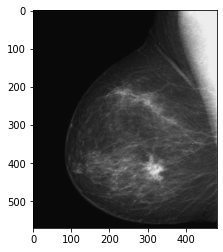

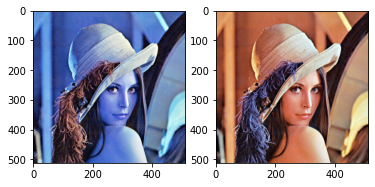

In [10]:
import cv2 as cv
from matplotlib import pyplot as plt

image = cv.imread(r"images\Fig0304(a)(breast_digital_Xray).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_lena = cv.imread(r"images\lena.png")
image_lena_rgb = cv.cvtColor(image_lena, cv.COLOR_BGR2RGB)

plt.imshow(image_gray, "gray")
plt.show()

plt.subplot(121), plt.imshow(image_lena)
plt.subplot(122), plt.imshow(image_lena_rgb)

plt.show()

3.2 一些灰度变换函数

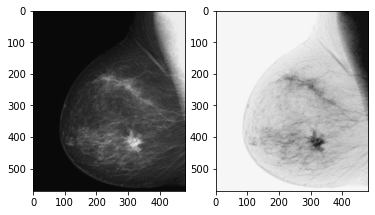

In [8]:
# 图像反转
import cv2 as cv
from matplotlib import pyplot as plt


image = cv.imread(r"images\Fig0304(a)(breast_digital_Xray).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_inv = image_gray.copy()

for i in range(image_inv.shape[0]):
    for j in range(image_inv.shape[1]):
        image_inv[i][j] = 255 - image_inv[i][j]

plt.subplot(121), plt.imshow(image_gray, "gray")
plt.subplot(122), plt.imshow(image_inv, "gray")
plt.show()


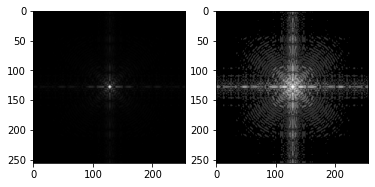

In [7]:
# 对数变换
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


image = cv.imread(r"images\Fig0305(a)(DFT_no_log).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_log = image_gray.copy()

for i in range(image_log.shape[0]):
    for j in range(image_log.shape[1]):
        image_log[i][j] = np.log(1 + image_log[i][j])

cv.normalize(image_log, image_log, 0, 255, cv.NORM_MINMAX)

plt.subplot(121), plt.imshow(image_gray, "gray")
plt.subplot(122), plt.imshow(image_log, "gray")
plt.show()

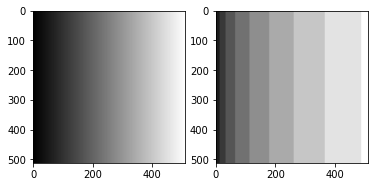

In [13]:
# 伽马变换
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


image = cv.imread(r"images\Fig0307(a)(intensity_ramp).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_gama = image_gray.copy()

for i in range(image_gama.shape[0]):
    for j in range(image_gama.shape[1]):
        image_gama[i][j] = np.power(image_gama[i][j], 0.4)

cv.normalize(image_gama, image_gama, 0, 255, cv.NORM_MINMAX)

plt.subplot(121), plt.imshow(image_gray, "gray")
plt.subplot(122), plt.imshow(image_gama, "gray")
plt.show()


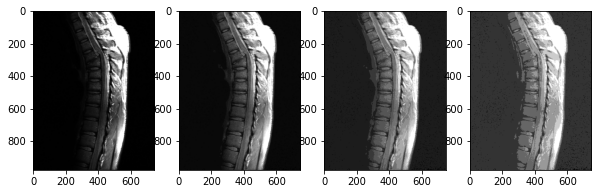

In [11]:
# 伽马变换
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


def gama(img, a):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j] = np.power(img[i][j], a)
    cv.normalize(img, img, 0, 255, cv.NORM_MINMAX)
    return img

image = cv.imread(r"images\Fig0308(a)(fractured_spine).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(image_gray, "gray")
plt.subplot(142), plt.imshow(gama(image_gray.copy(), 0.6), "gray")
plt.subplot(143), plt.imshow(gama(image_gray.copy(), 0.4), "gray")
plt.subplot(144), plt.imshow(gama(image_gray.copy(), 0.3), "gray")
plt.show()

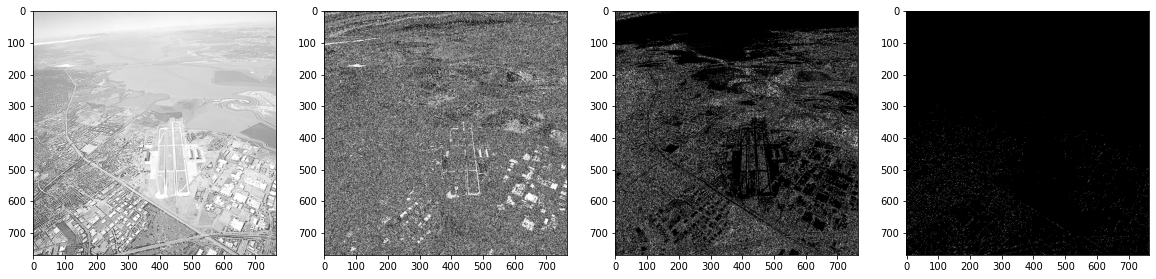

In [52]:
# 伽马变换
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


def gama(img, a):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j] = np.power(img[i][j], a)
    cv.normalize(img, img, 0, 255, cv.NORM_MINMAX)
    return img

image = cv.imread(r"images\Fig0309(a)(washed_out_aerial_image).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(image_gray, "gray")
plt.subplot(142), plt.imshow(gama(image_gray.copy(), 3.0), "gray")
plt.subplot(143), plt.imshow(gama(image_gray.copy(), 4.0), "gray")
plt.subplot(144), plt.imshow(gama(image_gray.copy(), 5.0), "gray")
plt.show()


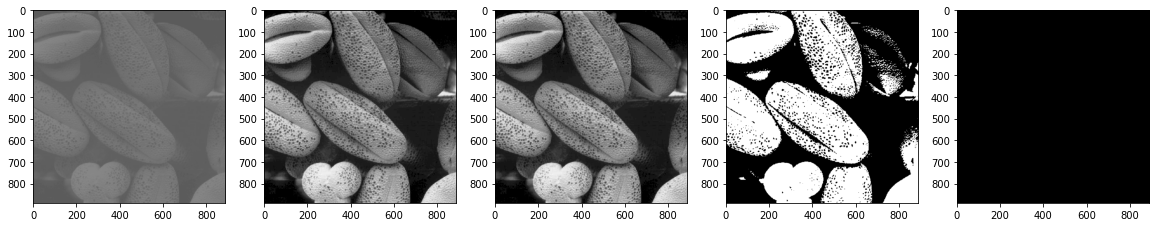

In [11]:
# 分段灰度拉伸
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


def gray_scale(img, r1, s1, r2, s2):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i][j] < r1):
                img[i][j] = s1 / r1 * img[i][j]
            elif (img[i][j] > r2):
                img[i][j] = (255 - s2) / (255 - r2) * (img[i][j] - r2) + s2
            else:
                img[i][j] = (s2 - s1) / (r2 - r1) * (img[i][j] - r1) + s1
    return img

image = cv.imread(r"images\Fig0310(b)(washed_out_pollen_image).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_scale = gray_scale(image_gray, np.min(image_gray), 0, np.max(image_gray), 255)

avg, image_thresh = cv.threshold(image_gray, np.average(image_gray), 255, cv.THRESH_BINARY)

plt.figure(figsize=(20, 20))
plt.subplot(151), plt.imshow(image)
plt.subplot(152), plt.imshow(image_gray, "gray")
plt.subplot(153), plt.imshow(image_scale, "gray")
plt.subplot(154), plt.imshow(image_thresh, "gray")
plt.subplot(155), plt.imshow(cv.absdiff(image_gray, image_scale), "gray")
plt.show()

103.52516774020397


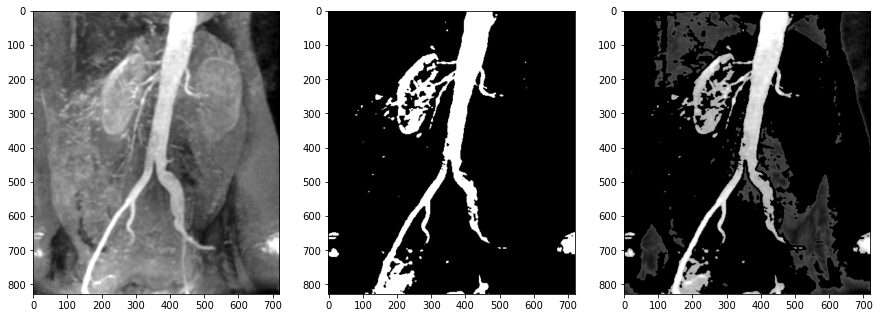

In [22]:
# 灰度级分层
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


def slice_a(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] > 150:
                img[i][j] = 255
            else:
                img[i][j] = 0
    return img

def slice_b(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if 70 < img[i][j] < 150:
                img[i][j] = 0
    return img
          
image = cv.imread(r"images\Fig0312(a)(kidney).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

print(np.average(image_gray))

plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(image_gray, "gray")
plt.subplot(132), plt.imshow(slice_a(image_gray.copy()), "gray")
plt.subplot(133), plt.imshow(slice_b(image_gray.copy()), "gray")
plt.show()

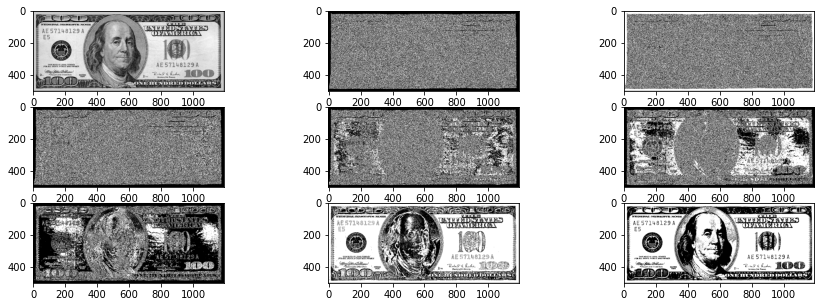

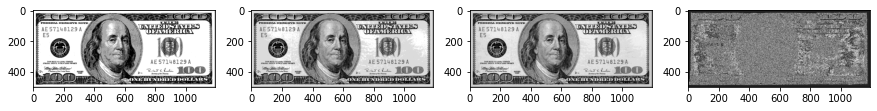

In [40]:
# 比特分层
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


image = cv.imread(r"images\Fig0314(a)(100-dollars).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

image_lists = []
for i in range(8):
    image_lists.append(image_gray.copy())
    for row in range(image_lists[i].shape[0]):
        for col in range(image_lists[i].shape[1]):
            image_lists[i][row][col] = np.bitwise_and(image_lists[i][row][col], np.power(2, i))

plt.figure(figsize=(15, 5))
plt.subplot(331), plt.imshow(image_gray, "gray")
for i in range(8):
    plt.subplot(3, 3, i+2)
    plt.imshow(image_lists[i], "gray")
plt.show()

image_87 = image_lists[7] + image_lists[6]
image_876 = image_lists[7] + image_lists[6] + image_lists[5]
image_8765 = image_lists[7] + image_lists[6] + image_lists[5] + image_lists[4]
image_diff = cv.absdiff(image_gray, image_8765)

plt.figure(figsize=(15, 5))
plt.subplot(141), plt.imshow(image_87, "gray")
plt.subplot(142), plt.imshow(image_876, "gray")
plt.subplot(143), plt.imshow(image_8765, "gray")
plt.subplot(144), plt.imshow(image_diff, "gray")
plt.show()

3.3 直方图处理

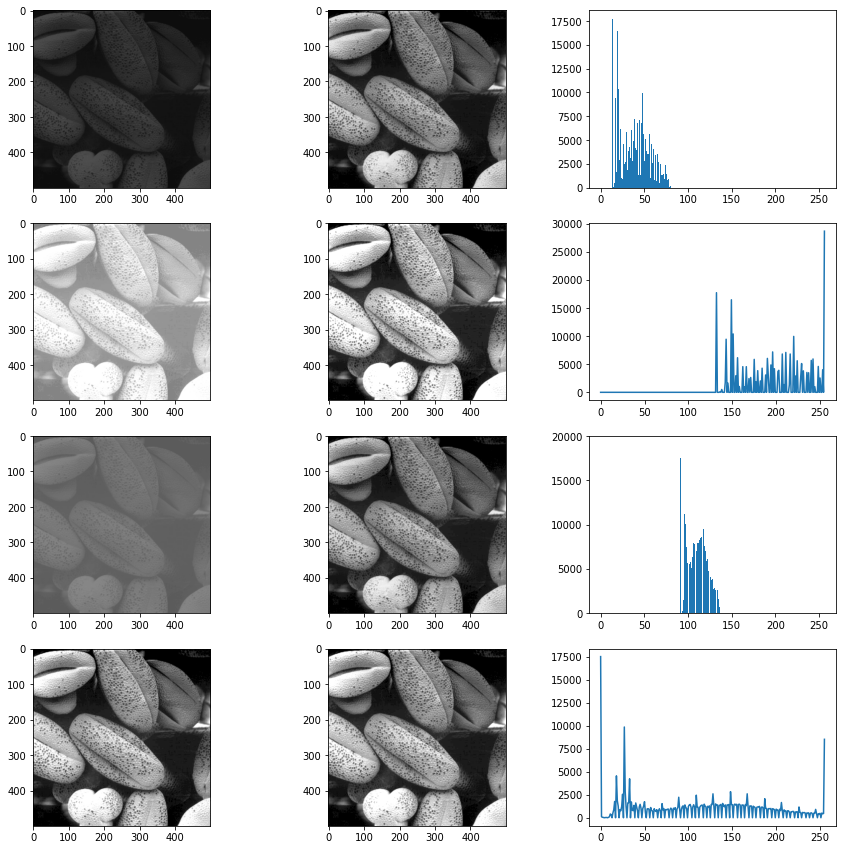

In [35]:
# 获取图像的直方图
# cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
# images：它是uint8或float32类型的源图像。它应该放在方括号中，即“ [img]”。
# channels：也以方括号给出。它是我们计算直方图的通道的索引。例如，如果输入为灰度图像，则其值为[0]。对于彩色图像，您可以传递[0]，[1]或[2]分别计算蓝色，绿色或红色通道的直方图。
# mask：遮罩图像。为了找到完整图像的直方图，将其指定为“无”。但是，如果要查找图像特定区域的直方图，则必须为此创建一个遮罩图像并将其作为遮罩。(我将在后面显示一个示例。)
# histSize：这表示我们的BIN计数。需要放在方括号中。对于全尺寸，我们通过[256]。
# ranges：这是我们的RANGE。通常为[0,256]。 因此，让我们从示例图像开始。只需在灰度模式下加载图像并找到其完整的直方图即可。
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


image_low_gray = cv.imread(r"images\Fig0316(4)(bottom_left).tif")
image_high_gray = cv.imread(r"images\Fig0316(1)(top_left).tif")
image_low_contrast = cv.imread(r"images\Fig0316(2)(2nd_from_top).tif")
image_high_contrast = cv.imread(r"images\Fig0316(3)(third_from_top).tif")

image_low_gray_gray = cv.cvtColor(image_low_gray, cv.COLOR_BGR2GRAY)
image_high_gray_gray = cv.cvtColor(image_high_gray, cv.COLOR_BGR2GRAY)
image_low_contrast_gray = cv.cvtColor(image_low_contrast, cv.COLOR_BGR2GRAY)
image_high_contrast_gray = cv.cvtColor(image_high_contrast, cv.COLOR_BGR2GRAY)

image_low_gray_gray_hist = cv.calcHist([image_low_gray_gray], [0], None, [256], [0, 256])
image_high_gray_gray_hist = cv.calcHist([image_high_gray_gray], [0], None, [256], [0, 256])
image_low_contrast_gray_hist = cv.calcHist([image_low_contrast_gray], [0], None, [256], [0, 256])
image_high_contrast_gray_hist = cv.calcHist([image_high_contrast_gray], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 15))
plt.subplot(431), plt.imshow(image_low_gray)
plt.subplot(432), plt.imshow(image_low_gray_gray, "gray")
plt.subplot(433), plt.hist(image_low_gray_gray.ravel(), 256, [0, 256])

plt.subplot(434), plt.imshow(image_high_gray)
plt.subplot(435), plt.imshow(image_high_gray_gray, "gray")
plt.subplot(436), plt.plot(image_high_gray_gray_hist)

plt.subplot(437), plt.imshow(image_low_contrast)
plt.subplot(438), plt.imshow(image_low_contrast_gray, "gray")
plt.subplot(439), plt.hist(image_low_contrast_gray.ravel(), 256, [0, 256])

plt.subplot(4, 3, 10), plt.imshow(image_high_contrast)
plt.subplot(4, 3, 11), plt.imshow(image_high_contrast_gray, "gray")
plt.subplot(4, 3, 12), plt.plot(image_high_contrast_gray_hist)
plt.show()

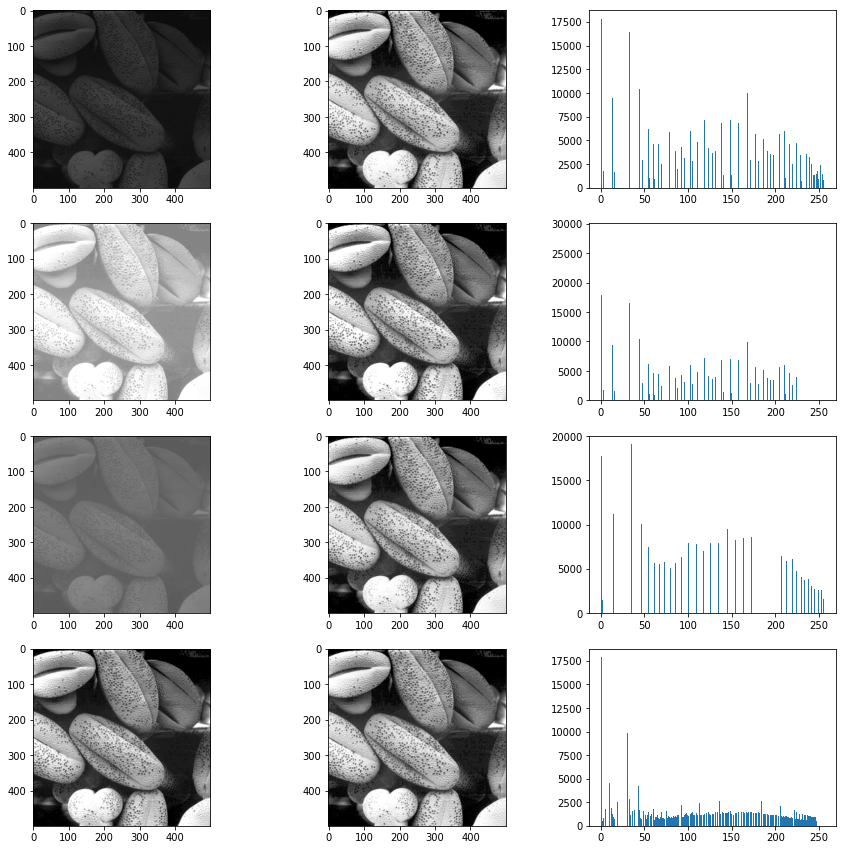

In [36]:
# 直方图均衡化
# 输入只能为灰度图

image_low_gray_gray_equ = cv.equalizeHist(image_low_gray_gray)
image_high_gray_gray_equ = cv.equalizeHist(image_high_gray_gray)
image_low_contrast_gray_equ = cv.equalizeHist(image_low_contrast_gray)
image_high_contrast_gray_equ = cv.equalizeHist(image_high_contrast_gray)

plt.figure(figsize=(15, 15))
plt.subplot(431), plt.imshow(image_low_gray)
plt.subplot(432), plt.imshow(cv.cvtColor(image_low_gray_gray_equ, cv.COLOR_GRAY2RGB))
plt.subplot(433), plt.hist(image_low_gray_gray_equ.ravel(), 256, [0, 256])

plt.subplot(434), plt.imshow(image_high_gray)
plt.subplot(435), plt.imshow(cv.cvtColor(image_high_gray_gray_equ, cv.COLOR_GRAY2RGB))
plt.subplot(436), plt.hist(image_high_gray_gray_equ.ravel(), 256, [0, 256])

plt.subplot(437), plt.imshow(image_low_contrast)
plt.subplot(438), plt.imshow(cv.cvtColor(image_low_contrast_gray_equ, cv.COLOR_GRAY2RGB))
plt.subplot(439), plt.hist(image_low_contrast_gray_equ.ravel(), 256, [0, 256])

plt.subplot(4, 3, 10), plt.imshow(image_high_contrast)
plt.subplot(4, 3, 11), plt.imshow(cv.cvtColor(image_high_contrast_gray_equ, cv.COLOR_GRAY2RGB))
plt.subplot(4, 3, 12), plt.hist(image_high_contrast_gray_equ.ravel(), 256, [0, 256])
plt.show()

In [ ]:
# 直方图匹配


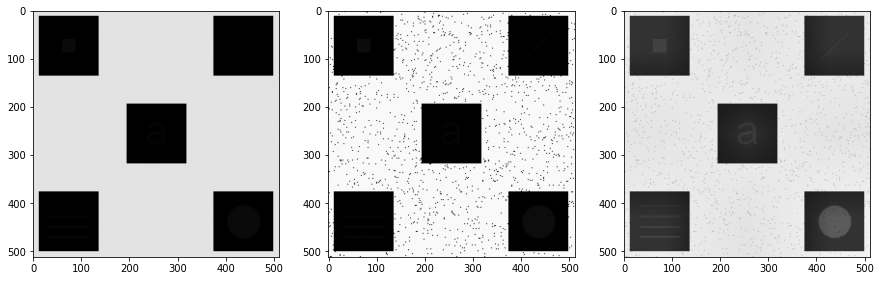

In [50]:
# 局部直方图均衡
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


image = cv.imread(r"images\Fig0326(a)(embedded_square_noisy_512).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
clahe = cv.createCLAHE(clipLimit=50.0, tileGridSize=(3, 3))
image_gray_equ = clahe.apply(image_gray)

plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(image)
plt.subplot(132), plt.imshow(cv.cvtColor(cv.equalizeHist(image_gray), cv.COLOR_GRAY2RGB))
plt.subplot(133), plt.imshow(cv.cvtColor(image_gray_equ, cv.COLOR_GRAY2RGB))
plt.show()

3.4 卷积

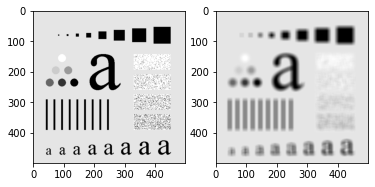

In [59]:
# 二维卷积
# cv.filter2D()
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


kernel = np.ones((15, 15)) / 225
image = cv.imread(r"images\Fig0333(a)(test_pattern_blurring_orig).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.subplot(121), plt.imshow(image)
plt.subplot(122), plt.imshow(cv.filter2D(image_gray, -1, kernel), "gray")
plt.show()

3.5 平滑空间滤波器，这里只展示课本的均值与中值，另外还有高斯滤波和双边滤波

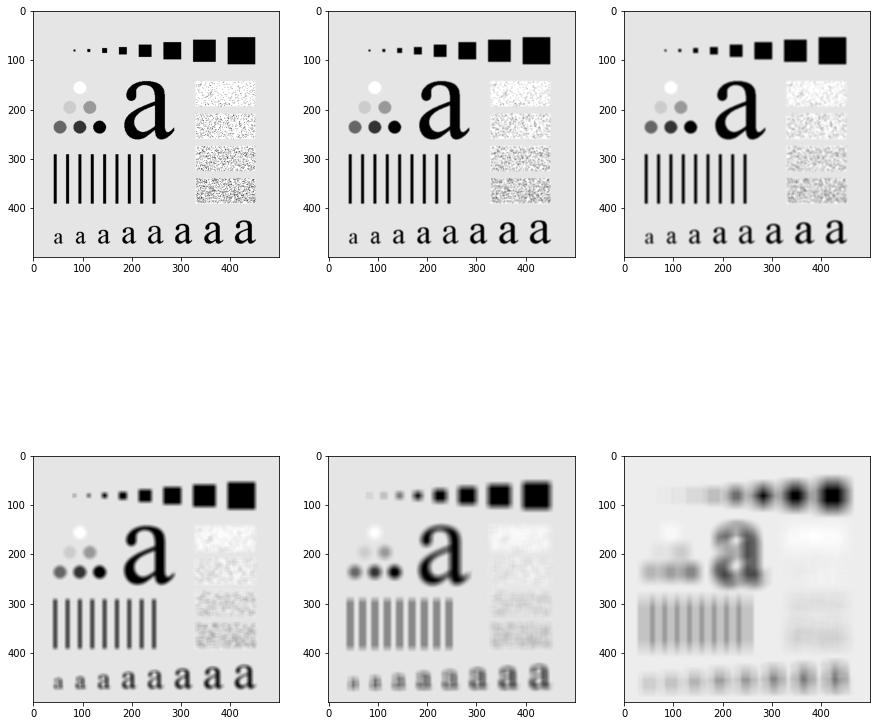

In [56]:
# 均值模糊
# cv.blur()
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


image = cv.imread(r"images\Fig0333(a)(test_pattern_blurring_orig).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 15))
plt.subplot(231), plt.imshow(image)
plt.subplot(232), plt.imshow(cv.blur(image_gray, (3, 3)), "gray")
plt.subplot(233), plt.imshow(cv.blur(image_gray, (5, 5)), "gray")
plt.subplot(234), plt.imshow(cv.blur(image_gray, (9, 9)), "gray")
plt.subplot(235), plt.imshow(cv.blur(image_gray, (15, 15)), "gray")
plt.subplot(236), plt.imshow(cv.blur(image_gray, (35, 35)), "gray")
plt.show()

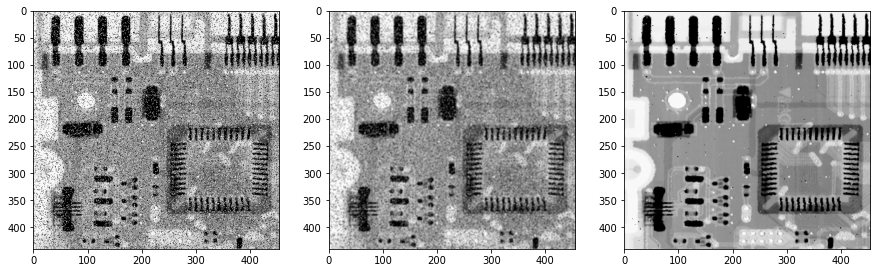

In [62]:
# 中值模糊处理椒盐噪声
# cv.medianBlur(), 核大小为奇数
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


image = cv.imread(r"images\Fig0335(a)(ckt_board_saltpep_prob_pt05).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(image)
plt.subplot(132), plt.imshow(cv.blur(image_gray, (3, 3)), "gray")
plt.subplot(133), plt.imshow(cv.medianBlur(image_gray, 3), "gray")
plt.show()

3.6 锐化空间滤波器

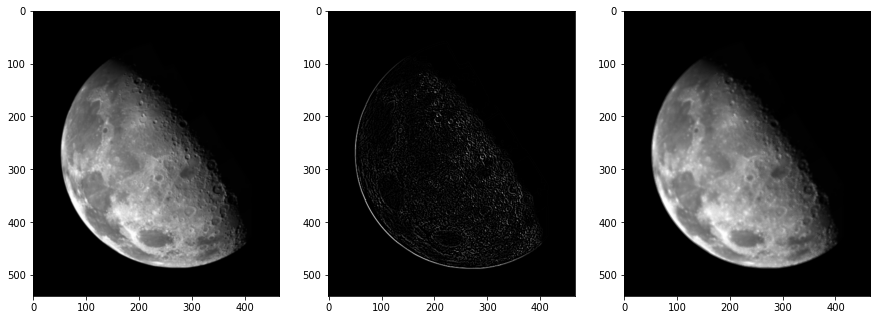

In [80]:
# 锐化
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


image = cv.imread(r"images\Fig0338(a)(blurry_moon).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_gray_lap = cv.Laplacian(image_gray, -1, ksize=1)

plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(image)
plt.subplot(132), plt.imshow(image_gray_lap, "gray")
plt.subplot(133), plt.imshow(image_gray + image_gray_lap, "gray")
plt.show()

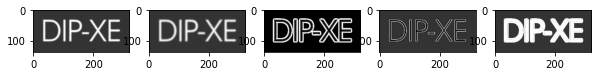

In [81]:
# 非锐化掩蔽和高提升滤波
# 其中使用到了高斯滤波
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


image = cv.imread(r"images\Fig0340(a)(dipxe_text).tif")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_gauss = cv.GaussianBlur(image_gray, (5, 5), 3)
image_sub = image_gray - image_gauss
image_1 = image_gray + image_sub
image_2 = cv.addWeighted(image_gray, 1, image_sub, 4.5, 0)

plt.figure(figsize=(10, 5))
plt.subplot(151), plt.imshow(image)
plt.subplot(152), plt.imshow(cv.cvtColor(image_gauss, cv.COLOR_GRAY2RGB))
plt.subplot(153), plt.imshow(cv.cvtColor(image_sub, cv.COLOR_GRAY2RGB))
plt.subplot(154), plt.imshow(cv.cvtColor(image_1, cv.COLOR_GRAY2RGB))
plt.subplot(155), plt.imshow(cv.cvtColor(image_2, cv.COLOR_GRAY2RGB))
plt.show()